In [49]:
import sys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import linear_model
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Lasso

import math
from sklearn.model_selection import KFold
from scipy.stats import norm
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D


X = np.loadtxt("hw1-q1x.csv")
Y = np.loadtxt("hw1-q1y.csv")

In [50]:
Y.mean()

25.801389809800003

In [51]:
data = np.column_stack((X,Y))

In [52]:
X_1_added = np.insert(X, 0, 1, axis=1)

In [53]:
### 1(a) data processing

X_data = np.insert(X,0,1, axis=1)

X_data_normalize = scale(X)


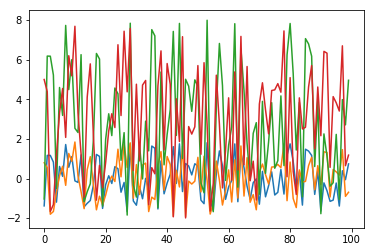

In [54]:
#visualize daa

plt.plot(scale(X))

#bigger fluctuation original data
plt.plot(X)
plt.show()

In [55]:
#shape of the data
print(X.shape)
print(Y.shape)

(100, 2)
(100,)


In [56]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)


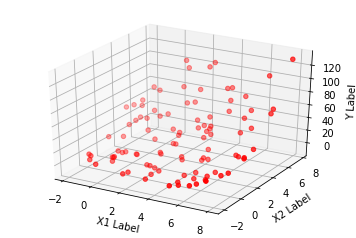

In [57]:

# 3D plot
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, c='r', marker='o')

ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')

plt.show()


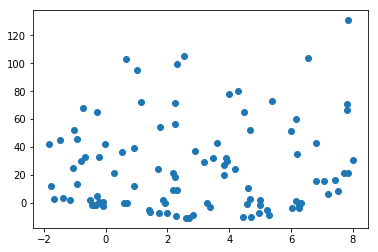

In [58]:
#X_1 to Y

plt.scatter(X[:,0], Y)
plt.show()

[0, 0.1, 1, 10, 100, 1000, 10000, 100000]
[15.287216333000899, 15.287229751057804, 15.28846848168981, 15.35753354010072, 16.10970623112069, 22.707349787503667, 36.159490674735501, 40.309057138652967]
[13.636846645431714, 13.644141740511063, 13.708190243766156, 14.218884791911755, 16.042806992350947, 24.009301776545566, 37.670979724548843, 41.785685343209906]
[13.046291153359908, 13.021060780435864, 12.80468619557821, 11.364034772390617, 8.7702931117130554, 5.0376876428932871, 1.1523770979490482, 0.13414063422156008]


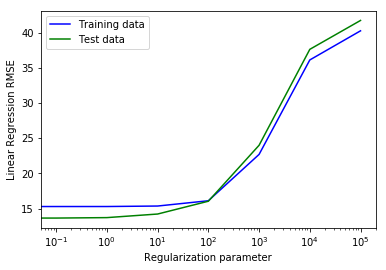

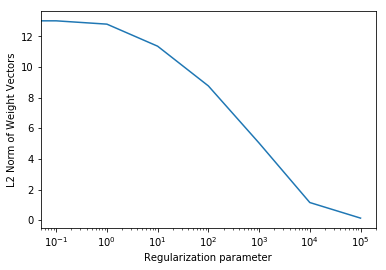

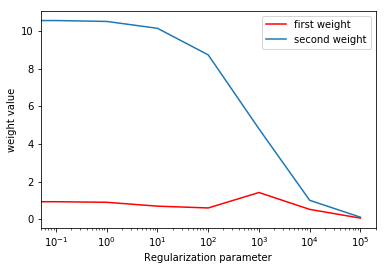

In [59]:
reg_parameter = [0, 0.1] + [10**i for i in range(6)]
print(reg_parameter)

#scale the input

train_set, test_set, y_train, y_test = train_test_split(X_1_added, Y, test_size=0.2, random_state=42)

X_train = pd.DataFrame(train_set)
X_test = pd.DataFrame(test_set)

#store coefficients / intercept

rmse_add = []
test_rmse_add = []
weight_vectors = []
intercept_vectors = []
l2_norm = []

for reg in reg_parameter:
    lin_reg = Ridge(alpha=reg, fit_intercept=False,random_state = 42)
    lin_reg.fit(X_train, y_train)

    y_predict = lin_reg.predict(X_train)
    lin_mse = mean_squared_error(y_train, y_predict)
    lin_rmse = np.sqrt(lin_mse)
    rmse_add.append(lin_rmse)
    weight_vectors.append(lin_reg.coef_)
    intercept_vectors.append(lin_reg.intercept_)
    l2_norm.append(np.linalg.norm(lin_reg.coef_))

    test_y_predict = lin_reg.predict(X_test)
    lin_mse_test = mean_squared_error(y_test, test_y_predict)
    lin_rmse_test = np.sqrt(lin_mse_test)
    test_rmse_add.append(lin_rmse_test)
print(rmse_add)
print(test_rmse_add)
print(l2_norm)

plt.plot(reg_parameter, rmse_add, 'b', label='Training data')
plt.plot(reg_parameter, test_rmse_add, 'g', label='Test data')
plt.xlabel('Regularization parameter')
plt.ylabel('Linear Regression RMSE')
plt.xscale('log')
plt.legend()
plt.show()

plt.plot(reg_parameter, l2_norm)
plt.xlabel('Regularization parameter')
plt.ylabel('L2 Norm of Weight Vectors')
plt.xscale('log')
plt.show()

plt.plot(reg_parameter, [i[1] for i in weight_vectors], 'r', label = 'first weight')
plt.plot(reg_parameter, [i[2] for i in weight_vectors], label = 'second weight')
plt.xlabel('Regularization parameter')
plt.ylabel('weight value')
plt.xscale('log')
plt.legend()
plt.show()


In [60]:
lin_reg

Ridge(alpha=100000, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)

In [61]:
lin_reg.predict(X_test)

array([ 0.74108212,  0.85555103,  0.40205088,  0.9126642 ,  0.74740009,
        0.23159518,  0.53911944,  1.11953463,  1.07310706,  0.52923718,
        0.49096899,  0.50800071,  0.40097339,  0.78077223,  0.15308479,
        0.12488844,  0.63183598,  0.79556792,  0.57307371,  0.23518741])

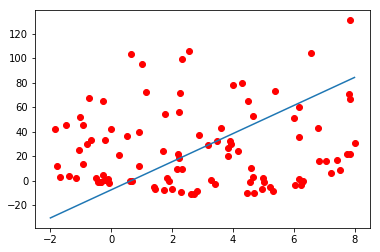

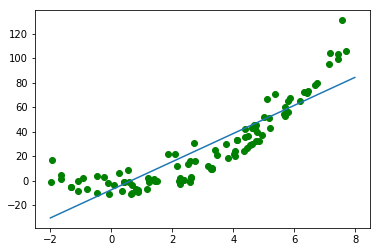

In [62]:
Y_fit = []
t = np.arange(-2,8, 0.01)
for j in range(len(weight_vectors)):
    Y_sub = []
    for i in t:
        Y_sub.append(weight_vectors[j][1]*i + weight_vectors[j][2]*i + weight_vectors[j][0])
    Y_fit.append(Y_sub)
plt.scatter(X[:,0],Y, c= 'r')
plt.plot(t,Y_fit[1])
plt.show()
plt.scatter(X[:,1],Y, c= 'g')
plt.plot(t,Y_fit[1])
plt.show()

[0, 0.1, 1, 10, 100, 1000, 10000, 100000]
[15.287216333000899, 15.287250770459943, 15.290590046779414, 15.562751005356986, 21.535886953318705, 30.313149122374682, 32.099162787317027, 32.295160447149897]
[13.636846645431705, 13.650214062994309, 13.770544791125705, 14.95356797819248, 22.109205253707042, 29.54684806527473, 30.978639461095515, 31.134872988038538]
[27.196646572999231, 27.165639534590927, 26.889729918331007, 24.410782232228289, 12.70502525749626, 2.1930199982161787, 0.23647925201756487, 0.023834626411439994]


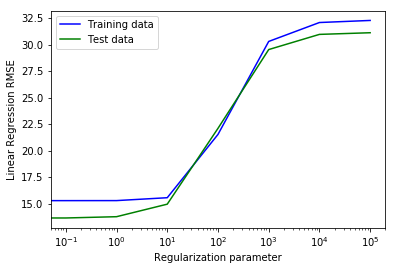

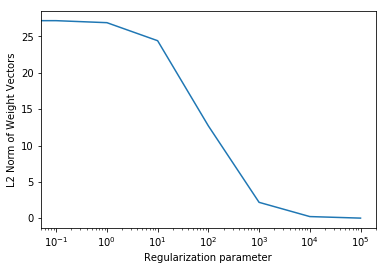

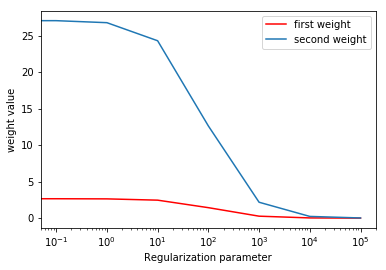

In [63]:
reg_parameter = [ 0, 0.1] + [10**i for i in range(6)]
print(reg_parameter)

#scale the input

train_set, test_set, y_train, y_test = train_test_split(scale(X), Y, test_size=0.2, random_state=42)

X_train = pd.DataFrame(train_set)
X_test = pd.DataFrame(test_set)

#store coefficients / intercept

rmse = []
test_rmse = []
weight_vectors = []
intercept_vectors = []
l2_norm = []

for reg in reg_parameter:
    lin_reg = Ridge(alpha=reg, fit_intercept=True)
    lin_reg.fit(X_train, y_train)

    y_predict = lin_reg.predict(X_train)
    lin_mse = mean_squared_error(y_train, y_predict)
    lin_rmse = np.sqrt(lin_mse)
    rmse.append(lin_rmse)
    weight_vectors.append(lin_reg.coef_)
    intercept_vectors.append(lin_reg.intercept_)
    l2_norm.append(np.linalg.norm(lin_reg.coef_))

    test_y_predict = lin_reg.predict(X_test)
    lin_mse_test = mean_squared_error(y_test, test_y_predict)
    lin_rmse_test = np.sqrt(lin_mse_test)
    test_rmse.append(lin_rmse_test)
print(rmse)
print(test_rmse)
print(l2_norm)

plt.plot(reg_parameter, rmse, 'b', label='Training data')
plt.plot(reg_parameter, test_rmse, 'g', label='Test data')
plt.xlabel('Regularization parameter')
plt.ylabel('Linear Regression RMSE')
plt.xscale('log')
plt.legend()
plt.show()

plt.plot(reg_parameter, l2_norm)
plt.xlabel('Regularization parameter')
plt.ylabel('L2 Norm of Weight Vectors')
plt.xscale('log')
plt.show()

plt.plot(reg_parameter, [i[0] for i in weight_vectors], 'r', label = 'first weight')
plt.plot(reg_parameter, [i[1] for i in weight_vectors], label = 'second weight')
plt.xlabel('Regularization parameter')
plt.ylabel('weight value')
plt.xscale('log')
plt.legend()
plt.show()


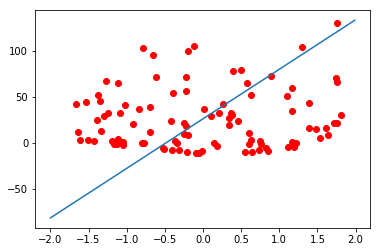

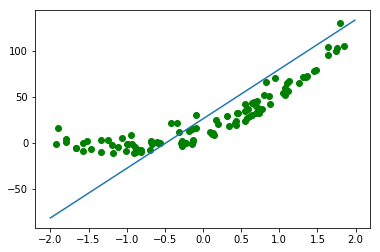

In [64]:
Y_fit = []
t = np.arange(-2,2, 0.01)
for j in range(len(weight_vectors)):
    Y_sub = []
    for i in t:
        Y_sub.append(weight_vectors[j][1]*i + weight_vectors[2][1]*i + intercept_vectors[j])
    Y_fit.append(Y_sub)
plt.scatter(scale(X[:,0]),Y, c= 'r')
plt.plot(t,Y_fit[0])
plt.show()
plt.scatter(scale(X[:,1]),Y, c= 'g')
plt.plot(t,Y_fit[0])
plt.show()

In [65]:
average_validation_scores = {}

for par in reg_parameter:
    lin_reg = Ridge(alpha=par)
    scores = cross_validate(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5, return_train_score=True
)


    print('For regularization parameter: %.1f' %par)
    print('Training scores: ' ,  str(np.sqrt(-scores['train_score'])))
    print('Average training score: ',np.average(np.sqrt(-scores['train_score'])))
    print('Validation scores: ',np.sqrt(-scores['test_score']))
    print('Average validation score: ', np.average(np.sqrt(-scores['test_score'])))
    print('\n')
    average_validation_scores[par] = np.average(np.sqrt(-scores['test_score']))

For regularization parameter: 0.0
Training scores:  [ 13.53563629  15.59113941  14.70803841  16.47343471  15.71364099]
Average training score:  15.2043779614
Validation scores:  [ 21.28192818  14.15543063  17.56118625   9.48059086  13.64658025]
Average validation score:  15.2251432351


For regularization parameter: 0.1
Training scores:  [ 13.53569454  15.59119444  14.70810316  16.47347909  15.71369282]
Average training score:  15.2044328107
Validation scores:  [ 21.2905267   14.14509034  17.55693361   9.49091017  13.6405595 ]
Average validation score:  15.2248040636


For regularization parameter: 1.0
Training scores:  [ 13.54131016  15.59650369  14.71432828  16.47776941  15.71869727]
Average training score:  15.2097217601
Validation scores:  [ 21.37023137  14.05834316  17.52708441   9.58617926  13.59141503]
Average validation score:  15.226650645


For regularization parameter: 10.0
Training scores:  [ 13.97342616  16.00873959  15.18199425  16.81739565  16.11001425]
Average training 

In [66]:
print(min(average_validation_scores, key=average_validation_scores.get), "is the best pick for lambda")

0.1 is the best pick for lambda


In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)


(80, 10)
(80, 10)
(80, 10)
(80, 10)
(20, 10)
               0             0             0             0             0  \
0   1.232119e-04  3.391497e-05  2.893212e-02  1.267388e-02  5.576628e-01   
1   7.473764e-18  1.670911e-02  2.685356e-12  4.410319e-01  7.920057e-08   
2   6.451369e-01  1.794226e-04  4.206026e-02  3.657056e-02  2.250898e-04   
3   5.552670e-01  7.685424e-16  8.840718e-01  1.179519e-10  1.155412e-01   
4   3.609214e-17  1.916351e-01  9.769655e-12  9.723888e-01  2.170749e-07   
5   7.698007e-01  4.317232e-01  6.921908e-01  9.601975e-01  5.109015e-02   
6   5.976761e-02  1.843674e-03  7.304471e-01  1.443819e-01  7.327831e-01   
7   3.748350e-17  5.124746e-08  1.007676e-11  1.398270e-04  2.223647e-07   
8   2.056375e-02  2.764956e-18  4.832193e-01  1.184563e-12  9.320733e-01   
9   4.849161e-01  9.959050e-08  2.073112e-02  2.262576e-04  7.275165e-05   
10  1.864494e-10  9.455845e-01  2.109246e-06  4.597702e-01  1.958651e-03   
11  5.477971e-01  5.037284e-07  2.769316e-0

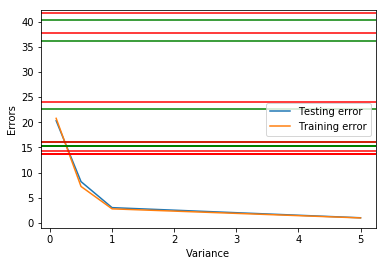

In [68]:
list_dataframes = [] # store list of transformed training set dataframes, each one has a different variance
means = [-1, -0.5, 0, 0.5, 1]
variances = [0.1, 0.5, 1, 5]

for var in variances:
    df = pd.DataFrame()
    for mean in means:
        for column in np.array(train_set).T:
            
            new_col = pd.DataFrame(np.exp(-((column-mean)**2)/(2*var) ) )
            df = pd.concat([df,new_col], axis=1)
    list_dataframes.append(df)
    print(df.shape)

list_test = [] # store list of transformed test set dataframes, each one has a different variance

for var in variances:
    df = pd.DataFrame()
    for mean in means:
        for column in np.array(test_set).T:
            new_col = pd.DataFrame(np.exp(-((column-mean)**2)/(2*var) ) )
            df = pd.concat([df,new_col], axis=1)
    list_test.append(df)
    print(df.shape)
    print(df)

gauss_train_rmse = []
gauss_test_rmse = []
for train_df, test_df in zip(list_dataframes,list_test):
    new_lin_reg = LinearRegression()
    new_lin_reg.fit(train_df, y_train)

    y_predict_train = new_lin_reg.predict(train_df)
    lin_mse = mean_squared_error(y_train, y_predict_train)
    lin_rmse = np.sqrt(lin_mse)
    gauss_train_rmse.append(lin_rmse)

    y_predict_test = new_lin_reg.predict(test_df)
    lin_mse = mean_squared_error(y_test, y_predict_test)
    lin_rmse = np.sqrt(lin_mse)
    gauss_test_rmse.append(lin_rmse)

print(gauss_train_rmse)
print(gauss_test_rmse)

plt.plot(variances, gauss_test_rmse, label='Testing error')
plt.plot(variances, gauss_train_rmse, label='Training error')
for scalar in rmse_add:
    plt.axhline(y=scalar, linestyle='-', color='g')
for scalar in test_rmse_add:
    plt.axhline(y=scalar, linestyle='-', color='r')
plt.xlabel('Variance')
plt.ylabel('Errors')
plt.legend()
plt.show()



In [69]:
###(i)



def polynomial_basis(X, degree):
    t = X[:,1]
    out = []
    for j in t:
        temp = 0
        sub_out = []
        for i in range(1,degree+1):
            sub_out.append(j**i)
        out.append(sub_out)
    return out

deg = [1,2,3,5,9]
reg = [0.01, 0.1, 1, 10]

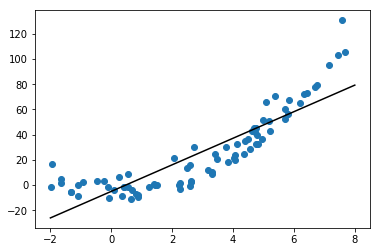

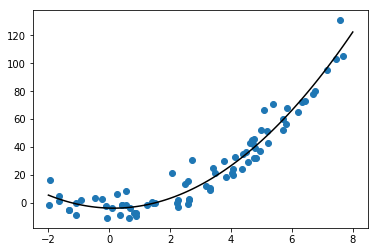

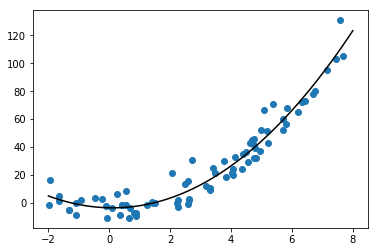

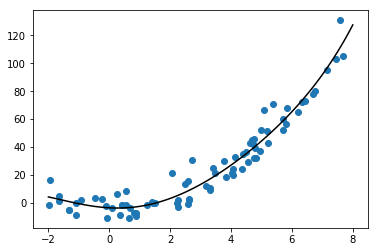

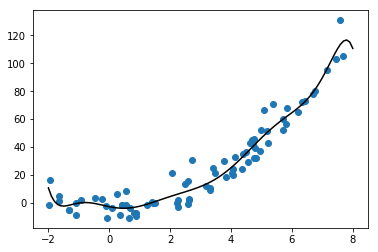

In [76]:
scores_array = {}

for i in deg:
    transform_basis_X = np.array(polynomial_basis(X_train, i))
    new_lin_reg = LinearRegression()
    new_lin_reg.fit(transform_basis_X, Y_train)
    #min_x = min(transform_basis_X[:,0])
    #max_x = max(transform_basis_X[:,0])
    #q = np.linspace()
    plt.scatter(transform_basis_X[:,0], Y_train, label = 'weight' + str(deg))
    x_plot = np.linspace(-2, 8, 100)
    plt.plot(x_plot, new_lin_reg.predict(polynomial_basis(np.array([(i,j) for i,j in zip(x_plot,x_plot)]), i)), 'k')
    plt.show()
    scores = cross_validate(new_lin_reg, transform_basis_X, Y_train, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
    scores_array[i] =  np.average(np.sqrt(-scores['test_score']))

In [77]:
print(scores_array)

{1: 16.013335562313266, 2: 7.7294003758067005, 3: 7.9612096674856101, 5: 8.3167530749028611, 9: 9.5745730422808268}


In [71]:
print(min(scores_array, key=scores_array.get), "is the best pick for degree")

2 is the best pick for degree


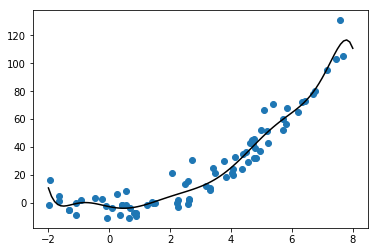

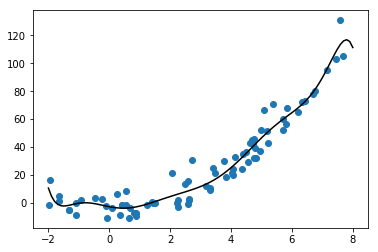

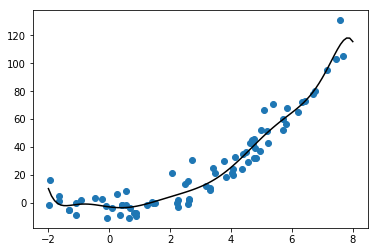

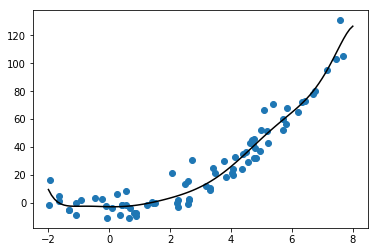

In [72]:
import warnings
warnings.filterwarnings('ignore')
scores_array = {}
for i in reg:
    transform_basis_X = np.array(polynomial_basis(X_train, 9))
    new_lin_reg = Ridge(alpha=i)
    new_lin_reg.fit(transform_basis_X, Y_train)
    #min_x = min(transform_basis_X[:,0])
    #max_x = max(transform_basis_X[:,0])
    #q = np.linspace()
    plt.scatter(transform_basis_X[:,0], Y_train, label = 'weight' + str(reg))
    x_plot = np.linspace(-2, 8, 100)
    plt.plot(x_plot, new_lin_reg.predict(polynomial_basis(np.array([(i,j) for i,j in zip(x_plot,x_plot)]), 9)), 'k')
    plt.show()
    scores = cross_validate(new_lin_reg, transform_basis_X, Y_train, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
    scores_array[i] =  np.average(np.sqrt(-scores['test_score']))
    

In [73]:
print(min(scores_array, key=scores_array.get), "is the best pick for lambda")

10 is the best pick for lambda


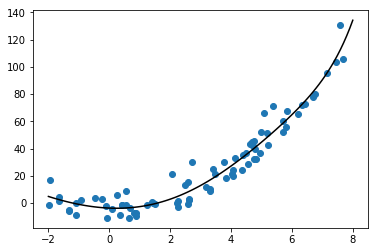

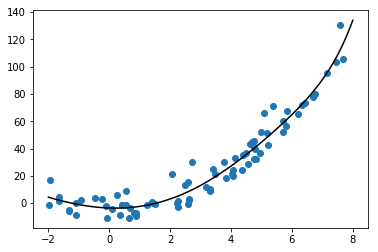

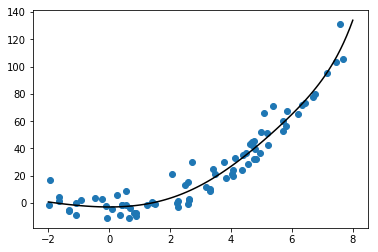

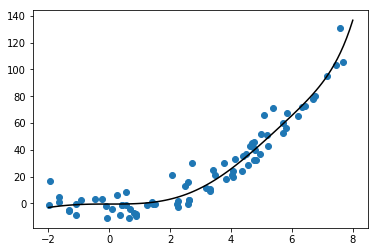

In [74]:
scores_array = {} 
import warnings
warnings.filterwarnings('ignore')

for i in reg:
    transform_basis_X = np.array(polynomial_basis(X_train, 9))
    new_lin_reg = Lasso(alpha=i)
    new_lin_reg.fit(transform_basis_X, Y_train)
    #min_x = min(transform_basis_X[:,0])
    #max_x = max(transform_basis_X[:,0])
    #q = np.linspace()
    plt.scatter(transform_basis_X[:,0], Y_train, label = 'weight' + str(reg))
    x_plot = np.linspace(-2, 8, 100)
    plt.plot(x_plot, new_lin_reg.predict(polynomial_basis(np.array([(i,j) for i,j in zip(x_plot,x_plot)]), 9)), 'k')
    plt.show()
    scores = cross_validate(new_lin_reg, transform_basis_X, Y_train, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
    scores_array[i] =  np.average(np.sqrt(-scores['test_score']))
    
    

In [ ]:
print(min(scores_array, key=scores_array.get), "is the best pick for lambda")

In [28]:
#5(c)
from sklearn import gaussian_process



X_GP = np.loadtxt("hw1-q5x.csv")
Y_GP = np.loadtxt("hw1-q5y.csv")




In [33]:
gp = gaussian_process.GaussianProcess()

In [34]:
gp.fit(X_GP,Y_GP)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.27272727 -0.49494949 -0.03030303 -0.27272727 -0.71717172 -0.25252525
 -0.53535354 -0.43434343 -0.45454545  0.5       ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.